In [25]:
import numpy as np

In [26]:
!ls DATA

eili51.txt


In [27]:
graph = np.array([[0, 0, 0]])

with open("DATA/eili51.txt", "r") as f:
    for line in f:
        # print(np.array(line.split(), "float64"))
        graph = np.append(graph, [np.array(line.split(), np.int)], axis=0)

graph = np.delete(graph, 0, 0)
graph = np.delete(graph, 0, axis = 1)

In [28]:
num_city = len(graph)

In [29]:
import matplotlib.pyplot as plt
import math

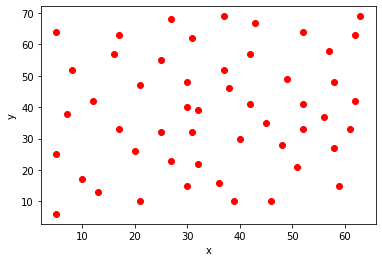

In [30]:
plt.plot(graph[:, 0], graph[:, 1], "ro")

# for i, (h, t, w) in enumerate(graph):
#     plt.plot([position[h, 0], position[t, 0]], [position[h, 1], position[t, 1]], "#75cce8")
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [31]:
def initial_pop (size):
    population = np.array([np.random.permutation(num_city) for i in range(size)])
    return population

population = initial_pop(100)

In [32]:
def distance(i_th, j_th):
    return np.sqrt(np.sum((graph[i_th] - graph[j_th]) ** 2))
distance(1, 5)

28.071337695236398

In [33]:
max_cost = 0
for i in range(num_city):
    for j in range(num_city):
        if distance(i, j) > max_cost:
            max_cost = distance(i, j)
max_cost += 1

In [34]:
# NOTE  optimizer
def fitness_func(ind):
    cost = 0
    for i in range(len(ind)):
        cost += distance(ind[i-1], ind[i]) 
    return -cost

fitness_func([0, 1, 2])


-46.87574812992988

In [35]:
# fitness score for each individual
pop_fit = np.apply_along_axis(fitness_func, 1, population)

In [36]:
#sort func
def sort_decrease(population, pop_fit):
    order = np.argsort(-pop_fit)
    return population[order], pop_fit[order]
population, pop_fit = sort_decrease(population, pop_fit)

In [37]:
def select_parent(population, percent):
    # choose from top gene: 0.3; random: 0.7
    parent = np.concatenate(
        (population[:int(0.3 * percent * len(population))], 
        np.array(population[np.random.choice(population.shape[0], size= int(0.7 * percent * len(population)))])),
        axis=0
    )
    return parent

select_parent(population, 0.5).shape

(50, 51)

In [38]:
a = np.arange(10)
np.random.shuffle(a)
a

array([5, 4, 2, 8, 0, 1, 6, 7, 3, 9])

In [39]:
def ordinal_hybridize(parent_inp):
    # random left and right
    left = int(np.random.uniform(parent_inp.shape[1]))
    right = int(np.random.uniform(parent_inp.shape[1]))
    if left > right: left, right = right, left

    # NOTE
    left = 0

    parent = np.copy(parent_inp)
    np.random.shuffle(parent)
    next_gen = np.zeros_like(parent_inp[0]).reshape(1, -1)

    def fill_else(parent1, parent2):
        # res[left: right] = parent1[left:right], else from parent2
        res = np.copy(parent1)
        res[np.append( np.arange(right, len(parent1)), np.arange(0, left)) ] = np.setdiff1d(parent2, parent1[left:right], True)

        return res

    for i in range (0, len(parent), 2):
        if (np.random.uniform(0, 1) < 0.7):
            new1 = fill_else(parent[i - 1], parent[i])
            new2 = fill_else(parent[i], parent[i - 1])
            next_gen = np.append(next_gen, [new1], axis = 0)
            next_gen = np.append(next_gen, [new2], axis = 0)


    return np.delete(next_gen, 0, axis = 0)

ordinal_hybridize(np.array([[1, 2, 3, 4, 5, 6, 7], [3, 2, 7, 5, 6, 4, 1]]) )

array([[3, 2, 7, 5, 6, 1, 4],
       [1, 2, 3, 4, 5, 7, 6]])

In [40]:
np.random.rand(1)

array([0.26655583])

In [41]:
# gene_mutate_rate la ti le 1 diem gen bi dot bien
def mutate(individuals, fit_funcs):
    gene_mutate_rate = 0.3

    for i in range(len(individuals)):
        ind = individuals[i]
        num_mutations = int(np.random.uniform(gene_mutate_rate * len(ind)))
        order = np.random.choice(np.arange(len(ind)), num_mutations, False)
        order_new = np.copy(order)
        np.random.shuffle(order_new)
        ind[order] = ind[order_new]
        if num_mutations > 0:   
            individuals[i] = ind
            fit_funcs[i] = fitness_func(individuals[i])
        
        
    return individuals, fit_funcs

samples = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 7, 5, 6, 4, 1, 9, 10, 8]])
mutate(samples, np.array([fitness_func(i) for i in samples ]))

(array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 3,  2,  7,  5,  6,  4,  1,  9, 10,  8]]),
 array([-221.80377508, -262.10831522]))

In [42]:
s = np.array([40, 19, 41, 13, 25, 14, 6, 48, 27, 51, 46, 12, 47, 18, 4, 42, 44, 17, 37, 15, 45, 33, 10, 39, 32,1,22,20,35,36,3,28,31,8,26, 7, 23, 24, 43]) - 1

In [43]:
fitness_func(s)

-414.5955462063096

In [44]:
int(np.random.uniform(0.3, 1, 1) * 1000)


771

In [45]:
def evol(num_epochs, population, pop_fit, max_size_population, percent_parent, rate_mutation):
    history = np.array([pop_fit[0]])
    print('Epoch [{}/{}], best_fit: {:.4f}'
        .format(0, num_epochs, pop_fit[0]))
    for epoch in range(num_epochs):
        # select parent
        parent = select_parent(population, percent_parent)

        # create new gen
        new_gen = ordinal_hybridize(parent)
        new_gen_fit_func = np.apply_along_axis(fitness_func, 1, new_gen)

        # mutate
        for i in range(len(new_gen)):
            flag = (np.random.uniform(0, 1) < rate_mutation)
            if flag:
                # head = int(np.random.uniform(0.2, 0.7, 1) * len(large_population))
                [new_gen[i]], [new_gen_fit_func[i]] = mutate([new_gen[i]], [new_gen_fit_func[i]])

            # order = np.array(np.random.choice(np.arange(len(large_population)), int(0.7*len(large_population)), False))
            # large_population[order], large_pop_fit[order] = mutate(large_population[order], large_pop_fit[order], gene_mutate_rate)

        # merge
        large_population = np.append(population, new_gen, axis=0)
        large_pop_fit = np.append(
            pop_fit, new_gen_fit_func, axis = 0)



        large_population, large_pop_fit = sort_decrease(large_population, large_pop_fit)

        if len(large_population) > max_size_population:
            # choose_value: delete individual from choose_value*[pop_size] until large_size = pop_size
            choose_value = np.random.uniform(0.3, 1)

            count_delete = len(large_population) - max_size_population

            delete_individual_ith = np.random.choice(np.arange(int(choose_value * max_size_population), len(large_population)), count_delete, False)

            large_population = np.delete(large_population, delete_individual_ith, 0)
            large_pop_fit = np.delete(large_pop_fit, delete_individual_ith, 0)

        population, pop_fit = large_population, large_pop_fit
        history = np.append(history, pop_fit[0])
        print('Epoch [{}/{}], best_fit: {:.4f}'
              .format(epoch + 1, num_epochs, pop_fit[0]))

    print(population.shape)
    return population[0], history


result, his = evol(1000, population, pop_fit, max_size_population= 1000, percent_parent = 0.5, rate_mutation= 0.1)


Epoch [0/1000], best_fit: -1428.6672
Epoch [1/1000], best_fit: -1365.4759
Epoch [2/1000], best_fit: -1365.4759
Epoch [3/1000], best_fit: -1365.4759
Epoch [4/1000], best_fit: -1365.4759
Epoch [5/1000], best_fit: -1344.0727
Epoch [6/1000], best_fit: -1344.0727
Epoch [7/1000], best_fit: -1344.0727
Epoch [8/1000], best_fit: -1344.0727
Epoch [9/1000], best_fit: -1344.0727
Epoch [10/1000], best_fit: -1336.3212
Epoch [11/1000], best_fit: -1281.3959
Epoch [12/1000], best_fit: -1281.3959
Epoch [13/1000], best_fit: -1256.6188
Epoch [14/1000], best_fit: -1256.4778
Epoch [15/1000], best_fit: -1254.4671
Epoch [16/1000], best_fit: -1216.8327
Epoch [17/1000], best_fit: -1216.8327
Epoch [18/1000], best_fit: -1196.7023
Epoch [19/1000], best_fit: -1171.5678
Epoch [20/1000], best_fit: -1171.5678
Epoch [21/1000], best_fit: -1111.3740
Epoch [22/1000], best_fit: -1111.3740
Epoch [23/1000], best_fit: -1100.0714
Epoch [24/1000], best_fit: -1100.0714
Epoch [25/1000], best_fit: -1095.2709
Epoch [26/1000], best_

KeyboardInterrupt: 

In [ ]:
plt.plot(np.arange(len(his)), his)
    
plt.xlabel("Epoch")
plt.ylabel("Fitness_func")
plt.show()